In [2]:
from config import *

In [3]:
levelups_ref = pd.read_csv("../data/levelups_panel_5.csv", encoding="utf-8")

In [4]:

#날짜 추출
levelups_ref['date_event'] = pd.to_datetime(levelups_ref['event_datetime']).dt.date
levelups_ref['date_event_prev'] = pd.to_datetime(levelups_ref['event_datetime_prev']).dt.date
levelups_ref['same_date'] = levelups_ref['date_event'] == levelups_ref['date_event_prev']

#플레이어 및 같은 날짜별 그룹화 및 해당 날짜 플레이 시간 계산
same_date_data = levelups_ref[levelups_ref['same_date']]
date_interval_sum = same_date_data.groupby(['player_slug', 'date_event'])['interval'].sum().reset_index()
date_interval_sum.rename(columns={'interval': 'date_interval'}, inplace=True)

levelups_ref = levelups_ref.merge(date_interval_sum, left_on=['player_slug', 'date_event'], right_on=['player_slug', 'date_event'], how='left')


In [5]:
mean_date_interval = levelups_ref['date_interval'].mean()
std_date_interval = levelups_ref['date_interval'].std()

print(f"Date Interval 평균: {mean_date_interval}")
print(f"Date Interval 표준편차: {std_date_interval}")

Date Interval 평균: 5.7678923659319015
Date Interval 표준편차: 6.312332526564661


In [6]:

max_date_interval = levelups_ref['date_interval'].max()


max_date_interval_index = levelups_ref[levelups_ref['date_interval'] == max_date_interval].index[0]

max_date_interval_row = levelups_ref.loc[max_date_interval_index]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

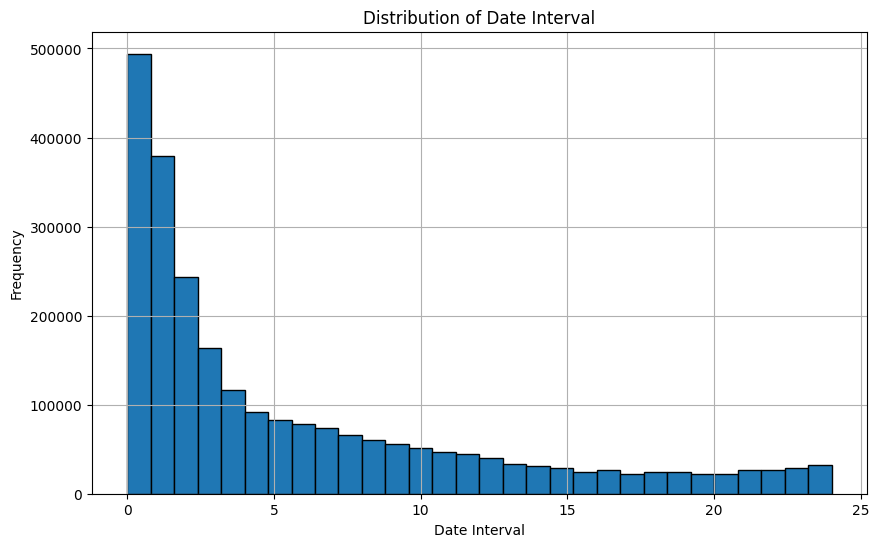

In [7]:

plt.figure(figsize=(10, 6))
plt.hist(levelups_ref['date_interval'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
check=levelups_ref[levelups_ref['character_slug']=='꼴딱']
check.to_csv('check.csv',index=False,encoding='cp949')

In [9]:
time_played = levelups_ref.groupby(["player_slug","character_slug"])["date_interval"].max()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

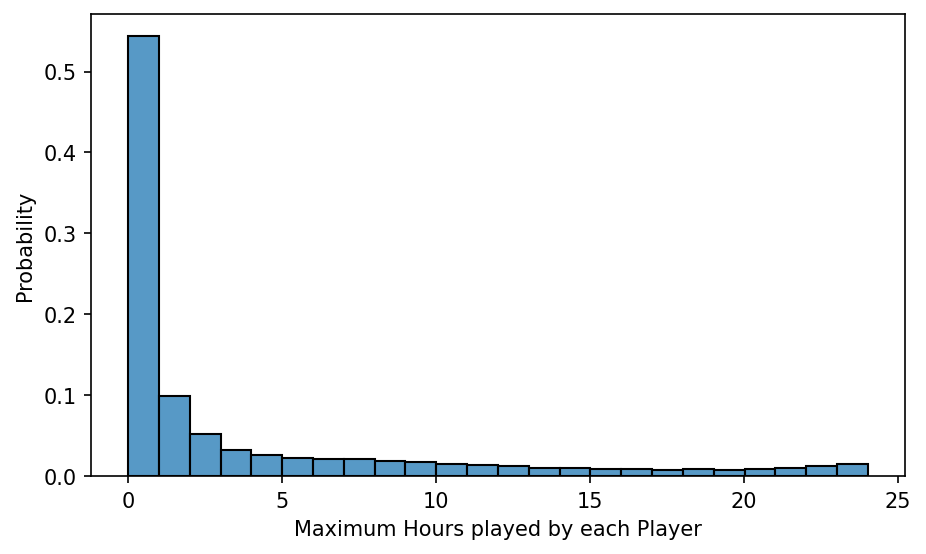

In [10]:
plt.rcParams["figure.figsize"] = [7,4]; plt.rcParams["figure.dpi"] = 150
sns.histplot(time_played, binwidth=1, stat="probability")
plt.xlabel("Maximum Hours played by each Player")
plt.show()

In [11]:
max_interval_per_player = levelups_ref.loc[levelups_ref.groupby('player_slug')['interval'].idxmax()]

max_interval_per_player['date_interval'].quantile(0.8)

3.5956666666666646

In [12]:
max_interval_per_player['binge'] = max_interval_per_player['date_interval'].apply(lambda x: 1 if x >= 3.5 else 0)


In [13]:
levelups_ref = levelups_ref.merge(max_interval_per_player[['player_slug', 'binge']], on='player_slug', how='left')


In [14]:

binge_groups = levelups_ref.groupby('binge').agg({'purchase': 'sum', 'player_slug': pd.Series.nunique}).reset_index()
binge_groups['purchase_per_player'] = binge_groups['purchase'] / binge_groups['player_slug']


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

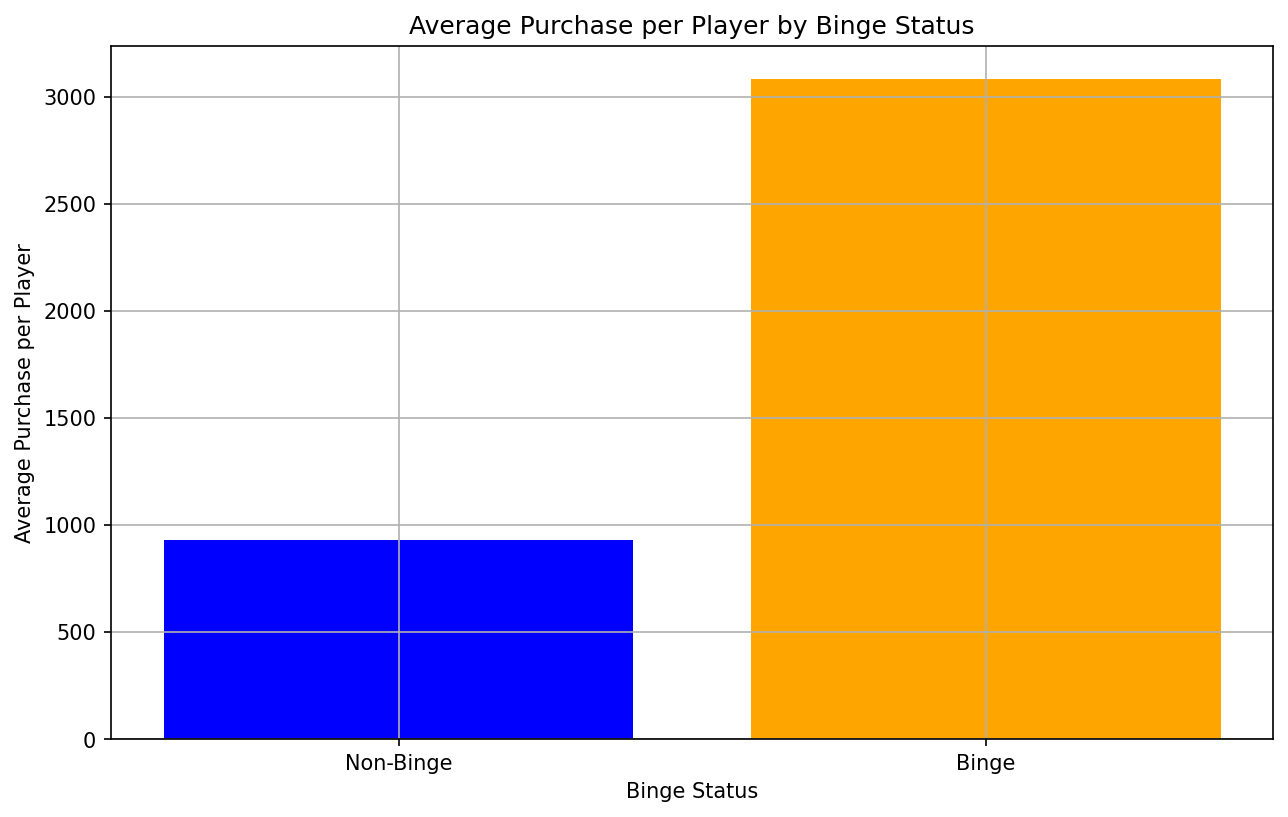

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(binge_groups['binge'], binge_groups['purchase_per_player'], color=['blue', 'orange'], tick_label=['Non-Binge', 'Binge'])
plt.title('Average Purchase per Player by Binge Status')
plt.xlabel('Binge Status')
plt.ylabel('Average Purchase per Player')
plt.grid(True)
plt.show()

In [23]:

logged_days = levelups_ref.groupby('player_slug')['date_event'].nunique().reset_index()
logged_days.rename(columns={'date_event': 'number_of_days_loggedin'}, inplace=True)


levelups_ref = levelups_ref.merge(logged_days, on='player_slug', how='left')


C:\Users\sunwoong\AppData\Local\Temp\ipykernel_31660\3618495920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=levelups_ref, x='binge', y='highest_level', palette=['blue', 'orange'], showfliers=False)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'Nanu

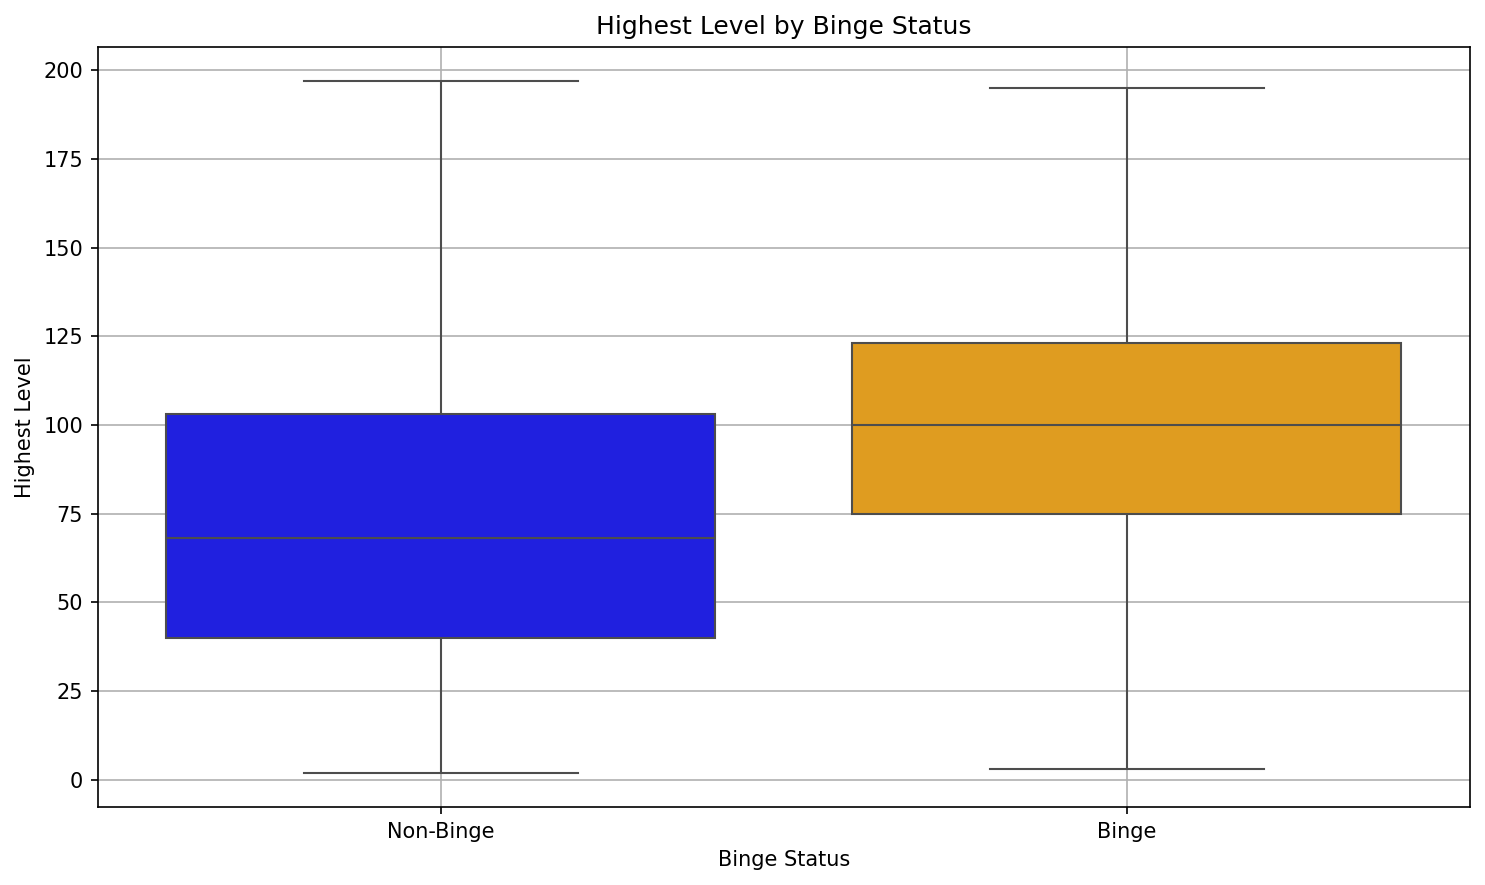

In [31]:
# 10. binge 여부에 따른 highest_level과 number_of_days_loggedin 비교
binge_comparison = levelups_ref.groupby('binge').agg({
    'highest_level': 'mean',
}).reset_index()


# 12. 박스 플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=levelups_ref, x='binge', y='highest_level', palette=['blue', 'orange'], showfliers=False)
plt.title('Highest Level by Binge Status')
plt.xlabel('Binge Status')
plt.ylabel('Highest Level')
plt.xticks(ticks=[0, 1], labels=['Non-Binge', 'Binge'])
plt.grid(True)

plt.tight_layout()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

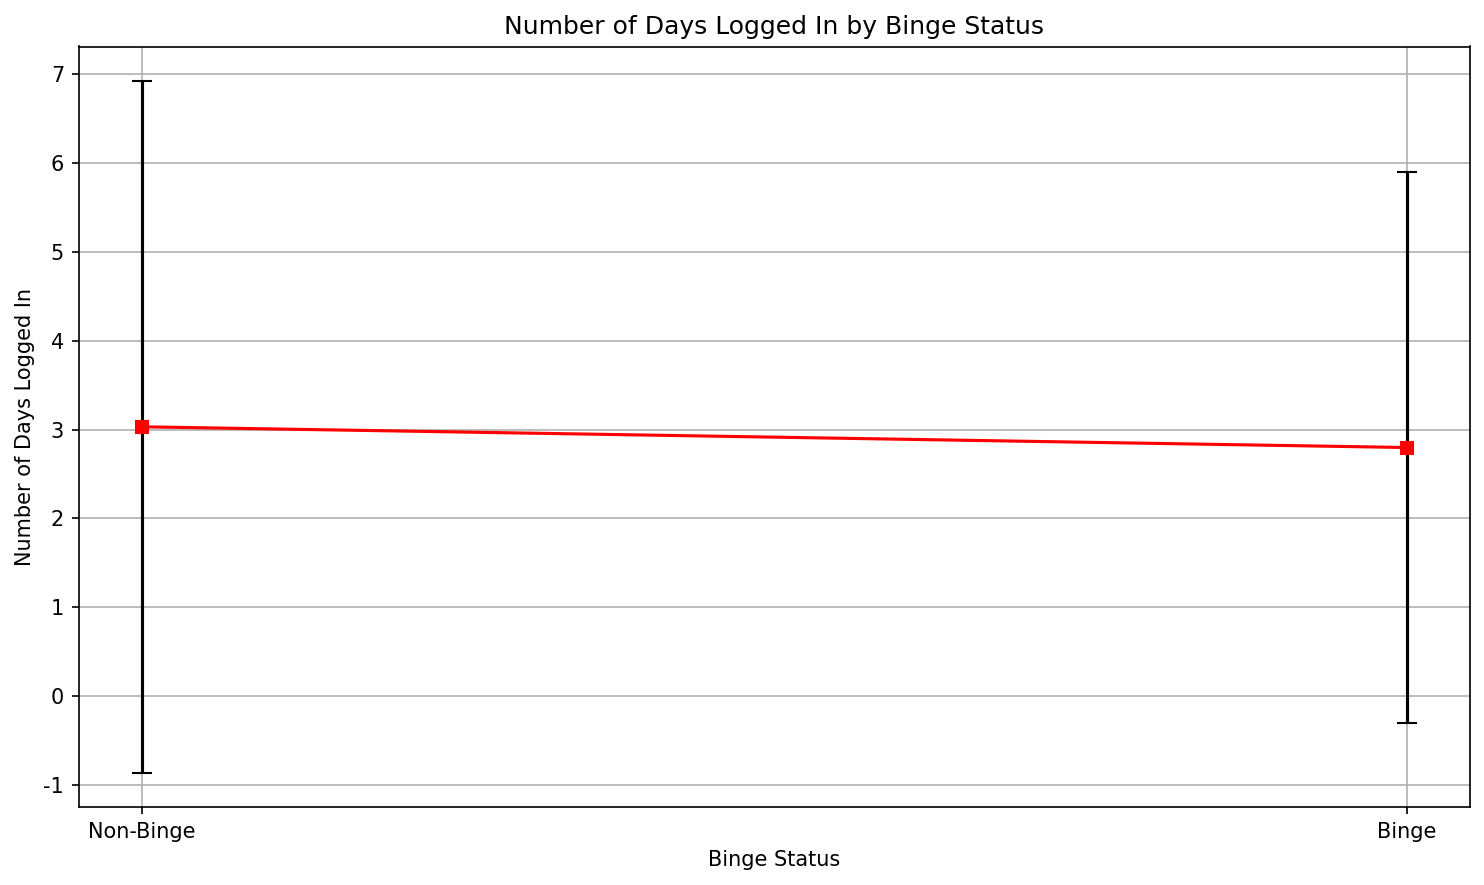

In [30]:
binge_comparison = levelups_ref.groupby('binge')['number_of_days_loggedin'].agg(['mean', 'std']).reset_index()

# 13. 시각화
plt.figure(figsize=(10, 6))
plt.errorbar(binge_comparison['binge'], binge_comparison['mean'], yerr=binge_comparison['std'], fmt='s-', color='red', ecolor='black', capsize=5)
plt.title('Number of Days Logged In by Binge Status')
plt.xlabel('Binge Status')
plt.ylabel('Number of Days Logged In')
plt.xticks(ticks=[0, 1], labels=['Non-Binge', 'Binge'])
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
levelups_ref.to_csv('new_binge.csv',index=False,encoding='cp949')